In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_blobs

mu = np.array([[-1.5, 2.3], [-2.8, 2.8], [-3.8, 1.3]])
std = np.array([0.3, 0.2, 0.4])

In [3]:
x, y = make_blobs(n_samples=2000, centers=mu, cluster_std=std, random_state=1)

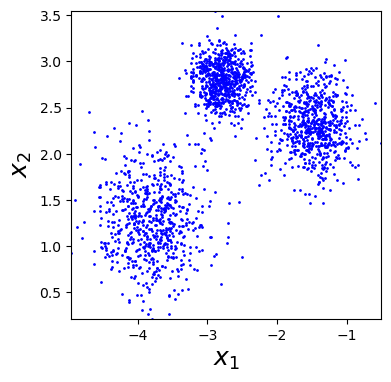

In [4]:
plt.figure(figsize=(4, 4))
plt.scatter(x[:, 0], x[:, 1], c='b', s=1)
plt.xlabel('$x_1$', fontsize=18)
plt.ylabel('$x_2$', fontsize=18)
plt.axis([x.min(axis=0)[0], x.max(axis=0)[0], x.min(axis=0)[1], x.max(axis=0)[1]])
plt.show()

In [5]:
#KMeans()

In [6]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, n_init=10, random_state=1)
kmeans.fit(x)

centroids = kmeans.cluster_centers_
centroids

array([[-3.81223699,  1.27611752],
       [-2.80077877,  2.7902435 ],
       [-1.48178866,  2.3098172 ]])

In [7]:
kmeans.inertia_

372.8477691419618

In [8]:
#Predict(hard)

In [9]:
xNew = np.array([[-3, 1.5], [-1, 2], [-3, 3], [-2, 2]])
kmeans.predict(xNew)

array([0, 2, 1, 2], dtype=int32)

In [10]:
#Predict(soft)

In [11]:
kmeans.transform(xNew)

array([[0.84252732, 1.30553337, 1.72068869],
       [2.90390818, 1.96654239, 0.57280626],
       [1.90564942, 0.28928686, 1.66772838],
       [1.95146323, 1.1250473 , 0.60376294]])

In [12]:
#Plot

In [13]:
def plotDecisionBoundaries(model, x, cen):
    mins = x.min(axis=0)
    maxs = x.max(axis=0)
    x1s = np.linspace(mins[0], maxs[0], 1000)
    x2s = np.linspace(mins[1], maxs[1], 1000)
    x1, x2 = np.meshgrid(x1s, x2s)
    xNew = np.c_[x1.ravel(), x2.ravel()]
    yPred = model.predict(xNew).reshape(x1.shape)
    
    plt.scatter(x[:, 0], x[:, 1], c='b', s=1)
    plt.contourf(x1, x2, yPred, alpha=.2)
    plt.contour(x1, x2, yPred, linewidths=1, colors='k')
    plt.scatter(cen[:, 0], cen[:, 1], marker='x', s=5, linewidths=10, c='r', alpha=1)
    
    plt.axis([mins[0], maxs[0], mins[1], maxs[1]])
    plt.xlabel('$x_1$', fontsize=18)
    plt.ylabel('$x_2$', fontsize=18)

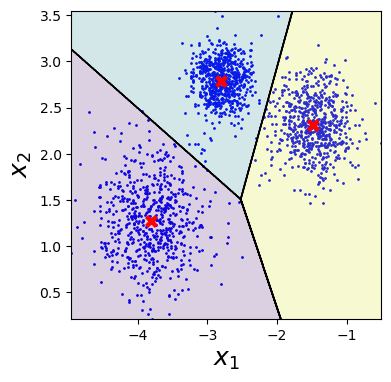

In [14]:
plt.figure(figsize=(4, 4))
plotDecisionBoundaries(kmeans, x, centroids)
plt.show()

In [15]:
#MiniBatcvhKMeans()

In [16]:
from sklearn.cluster import MiniBatchKMeans

minibatchKmeans = MiniBatchKMeans(n_clusters=3, random_state=1, n_init='auto')
minibatchKmeans.fit(x)
minibatchKmeans.inertia_

372.88899842258274

In [17]:
#Select k (Inertia)

In [18]:
kmeansK = [KMeans(n_clusters=k, random_state=1, n_init='auto').fit(x) for k in range(1,10)]

inertias = [model.inertia_ for model in kmeansK]

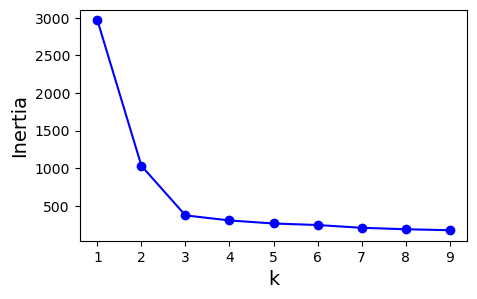

In [19]:
plt.figure(figsize=(5, 3))
plt.plot(range(1, 10), inertias, 'bo-')
plt.xlabel('k', fontsize=14)
plt.ylabel('Inertia', fontsize=14)
plt.show()

In [20]:
#Select K (Silhouette score)

In [21]:
#Silhouette coefficients

In [22]:
from sklearn.metrics import silhouette_samples

silhouette_samples(x, kmeans.labels_)[:3]

array([0.75597035, 0.73146346, 0.69265488])

In [23]:
#Silhouette score

In [24]:
from sklearn.metrics import silhouette_score

silhouette_score(x, kmeans.labels_)

0.6582504699868791

In [25]:
#Plot(Silhouette scores)

In [26]:
silhouetteScores = [silhouette_score(x, model.labels_) for model in kmeansK[1:]]

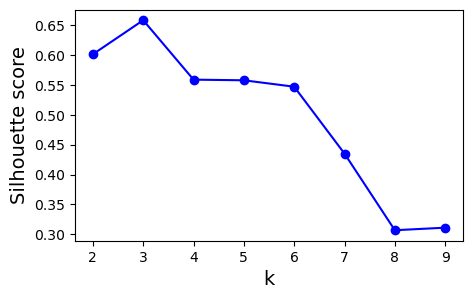

In [27]:
plt.figure(figsize=(5, 3))
plt.plot(range(2, 10), silhouetteScores, 'bo-')
plt.xlabel('k', fontsize=14)
plt.ylabel('Silhouette score', fontsize=14)
plt.show()

In [28]:
#Plot(Silhouette coefficients)

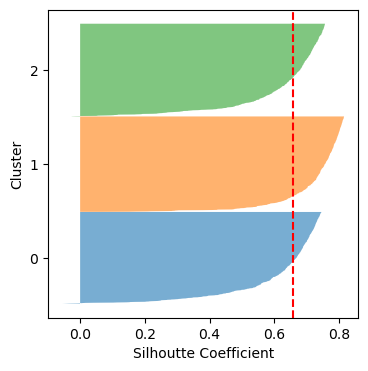

In [29]:
from matplotlib.ticker import FixedLocator, FixedFormatter
plt.figure(figsize=(4, 4))

k=3
yPred = kmeansK[k-1].labels_
silhouetteCoefficients = silhouette_samples(x, yPred)

pos = 0
ticks = []
for i in range(k):
    coefs = (silhouetteCoefficients[yPred == i])
    coefs.sort()
    plt.fill_betweenx(np.arange(pos, pos + len(coefs)), 0, coefs, alpha=.6)
    ticks.append(pos + len(coefs) // 2)
    pos += len(coefs)
plt.axvline(x=silhouetteScores[k - 2], color='r', linestyle='--')

plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
plt.xlabel('Silhoutte Coefficient')
plt.ylabel('Cluster')
plt.show()